In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Preparation

In [3]:
class_name = 'Occupancy'
df = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/whole.csv')
columns2remove = ['Unnamed: 0']
df.drop(columns2remove, inplace=True, axis=1)
df['date'] =  pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df.sort_values('date', inplace = True)
df.reset_index(inplace = True, drop = True)
df.set_index('date', inplace=True)
df=df[df['Light']<1000] 
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1


In [4]:
class_name = 'Occupancy'
train = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/training.csv')
columns2remove = ['Unnamed: 0']
train.drop(columns2remove, inplace=True, axis=1)
train['date'] =  pd.to_datetime(train['date'], format = '%Y-%m-%d %H:%M:%S')
train.sort_values('date', inplace = True)
train.reset_index(inplace = True, drop = True)
train.set_index('date', inplace=True)
train=train[train['Light']<1000] 
train

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2015-02-18 09:14:00,20.8150,27.4175,430.750000,1511.750000,0.004167,1
2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1


In [5]:
class_name = 'Occupancy'
test = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/test.csv')
columns2remove = ['Unnamed: 0']
test.drop(columns2remove, inplace=True, axis=1)
test['date'] =  pd.to_datetime(test['date'], format = '%Y-%m-%d %H:%M:%S')
test.sort_values('date', inplace = True)
test.reset_index(inplace = True, drop = True)
test.set_index('date', inplace=True)
test=test[test['Light']<1000] 
test

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.700,26.2720,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.718,26.2900,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.730,26.2300,572.666667,769.666667,0.004765,1
2015-02-02 14:23:00,23.754,26.2000,488.600000,779.000000,0.004767,1
2015-02-02 14:25:00,23.730,26.2900,536.333333,798.000000,0.004776,1
...,...,...,...,...,...,...
2015-02-18 09:11:59,20.790,27.0300,419.000000,1488.000000,0.004101,1
2015-02-18 09:15:00,20.815,27.7175,429.750000,1505.250000,0.004213,1
2015-02-18 09:16:00,20.865,27.7450,423.500000,1514.500000,0.004230,1


In [6]:
attributes = ['Temperature', 'Humidity', 'Light', 'CO2']

In [7]:
X_train = train[attributes].values

y_train = train[class_name]

X_train.shape 

(14384, 4)

In [8]:
X_test = test[attributes].values

y_test = test[class_name]

X_test.shape

(6168, 4)

In [9]:
X = df[attributes].values
y = df[class_name]
X.shape

(20551, 4)

In [10]:
scaler = MinMaxScaler()
X_tr_sc = scaler.fit_transform(X_train)
df_tr_sc = pd.DataFrame(X_tr_sc)
X_te_sc = scaler.fit_transform(X_test)
df_te_sc = pd.DataFrame(X_te_sc)
X_sc = scaler.fit_transform(X)
df_sc = pd.DataFrame(X_sc)

In [11]:
df_sc.columns = ['Temperature', 'Humidity', 'Light', 'CO2']

# Box Plot

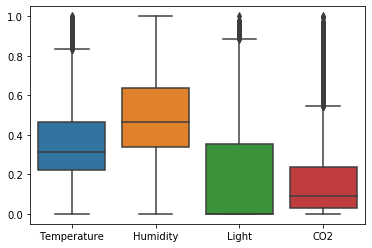

In [12]:
sns.boxplot(data=[X_sc[:,0], X_sc[:,1], X_sc[:,2], X_sc[:,3]])
plt.xticks([0,1,2,3], [attributes[0], attributes[1], attributes[2], attributes[3]])
plt.show()

In [13]:
df_sc[(df_sc['Temperature']>=0.85) | (df_sc['Light']>=0.9) | (df_sc['CO2']>=0.55)]

,Temperature,Humidity,Light,CO2
0,0.869029,0.418677,0.693365,0.202224
1,0.872357,0.419468,0.685308,0.208956
2,0.874576,0.416831,0.678515,0.214525
3,0.873190,0.412217,0.585012,0.217581
4,0.879014,0.415513,0.578910,0.220135
...,...,...,...,...
20546,0.335593,0.482202,0.509182,0.656649
20547,0.344838,0.483410,0.501777,0.662209
20548,0.349461,0.483410,0.501777,0.666416
20549,0.349461,0.495605,0.496149,0.732832


# DBSCAN

In [14]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS
import seaborn as sns

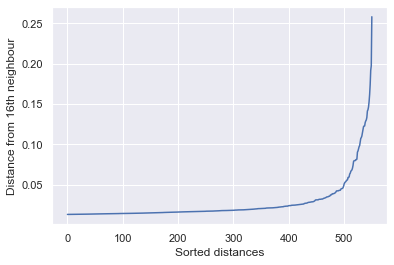

In [15]:
sns.set()
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X_sc)
distances, indices = nbrs.kneighbors(X_sc)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances[20000:])
plt.ylabel('Distance from 16th neighbour')
plt.xlabel('Sorted distances')
plt.show()

In [16]:
dbscan = DBSCAN(eps=0.05, min_samples=8)
dbscan.fit(X_sc)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [17]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19]),
 array([ 112, 8014, 8728,   21,   30,   16,   24,  601,   22, 1070,   23,
          56,   45,  305,   22,  241,   37,  266,   25,  288,  605]))

In [18]:
df['outliers'] = np.nan
df['label'] = dbscan.labels_
for i in range(0,len(df)):
    if df['label'][i] == -1:
        df['outliers'][i] = 1
    else:
        df['outliers'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


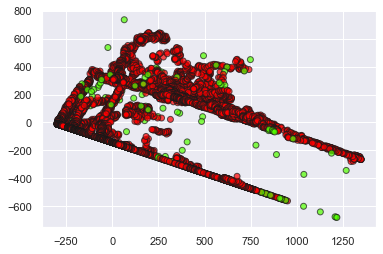

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# LOF

In [20]:
from sklearn.neighbors import LocalOutlierFactor

In [21]:
clf = LocalOutlierFactor(n_neighbors=600)
outliers = clf.fit_predict(X)

negative_outlier_factor_

The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

In [22]:
clf.negative_outlier_factor_

array([-1.73036052, -1.68016022, -1.65512022, ..., -1.15851622,
       -1.41032259, -1.90195296])

In [23]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 2831, 17720]))

In [24]:
np.where(outliers==-1)

(array([    0,     1,     2, ..., 20102, 20103, 20550]),)

In [25]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([-1.73036052, -1.68016022, -1.65512022, ..., -3.43611531,
       -3.13107923, -1.90195296])

In [26]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-1.5002008655383783

In [27]:
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-5.545027166755743

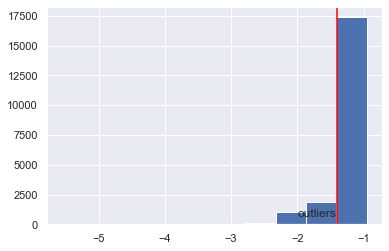

In [28]:
plt.hist(clf.negative_outlier_factor_)
plt.axvline(-1.4,c='red')
plt.text(-2, 600, 'outliers')
plt.show()

In [29]:
df['outliers'] = 0
for i in np.where(outliers==-1):
    df['outliers'][i] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


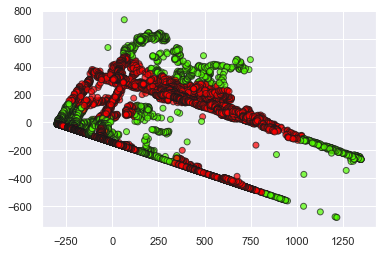

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [31]:
# Generate train data
X_inliers = X[np.where(outliers!=-1)]
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = X[np.where(outliers==-1)]
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

#y_pred = clf.fit_predict(Xa)
#n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [32]:
Xa.shape

(38271, 4)

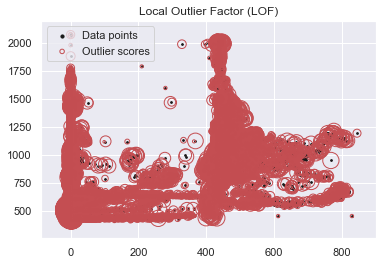

In [33]:
X_scores = clf.negative_outlier_factor_
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 2], X[:, 3], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 2], Xa[:, 3], s=1000 * radius, edgecolors='r',facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [36]:
outliers = clf.predict(X_test)

In [37]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([1662, 4506]))

# PyOD

https://pyod.readthedocs.io/en/latest/#

In [38]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.models.auto_encoder import AutoEncoder

Using Theano backend.


## ABOD

In [39]:
clf = ABOD(n_neighbors=20)
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=20)

In [40]:
clf.decision_scores_

array([-6.97718580e-07, -2.94074705e-06, -5.81050393e-06, ...,
       -2.57822904e-06, -2.58540178e-06, -1.64391489e-07])

In [41]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([18588,  1963]))

In [42]:
np.mean(clf.decision_scores_[np.where(outliers==0)])

-1012.5804132108635

In [43]:
clf.decision_scores_.min()

-8433406.209377347

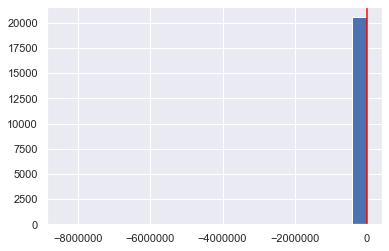

In [44]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.max(clf.decision_scores_[np.where(outliers==1)]), c='red')
plt.show()

## KNN

In [45]:
clf = KNN(n_neighbors=100)
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=100, p=2,
  radius=1.0)

In [46]:
clf.decision_scores_

array([101.56050849,  93.93488301,  88.88103935, ...,  68.54687903,
       128.67229393, 121.82969732])

In [47]:
anomlay_score = clf.decision_function(X)

In [48]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([18533,  2018]))

In [49]:
np.mean(anomlay_score[np.where(outliers==1)])

79.10754392909583

In [50]:
np.mean(anomlay_score)

17.79716325159305

In [51]:
anomlay_score[np.where(outliers==1)].min()

48.674104026454266

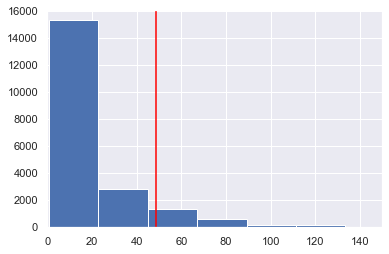

In [52]:
plt.hist(anomlay_score, bins=20)
plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='red')
plt.xlim([0,150])
plt.show()

In [53]:
np.mean(anomlay_score[np.where(outliers==0)])

11.121268997710754

In [54]:
np.mean(clf.decision_scores_[np.where(outliers==1)])

79.77143418572615

In [55]:
np.mean(clf.decision_scores_[np.where(outliers==0)])

11.191582110913163

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


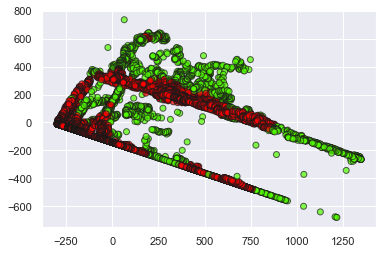

In [56]:
df['outliers'] = 0
for i in np.where(outliers==1):
    df['outliers'][i] = 1

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# AutoEncoder

In [57]:
clf = AutoEncoder(epochs=50, hidden_neurons=[4,2,2,4])

In [58]:
clf.fit(X)

outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

(array([0, 1]), array([18496,  2055]))

In [59]:
anomlay_score = clf.decision_function(X)

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(anomlay_score.reshape(-1, 1))
line = scaler.transform(np.min(anomlay_score[np.where(outliers==1)]).reshape(1, -1))

In [61]:
len(anomlay_score[np.where(outliers==1)])

2055

In [62]:
outliers_proba = clf.predict_proba(X)

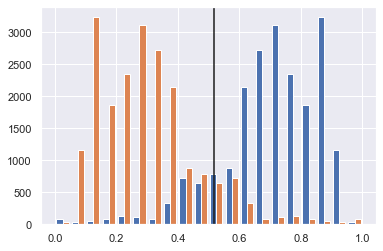

In [63]:
plt.hist(outliers_proba, bins=20)
plt.axvline(line, c='k')
plt.show()

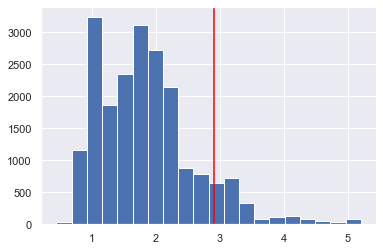

In [64]:
plt.hist(anomlay_score, bins=20)
plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='red')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


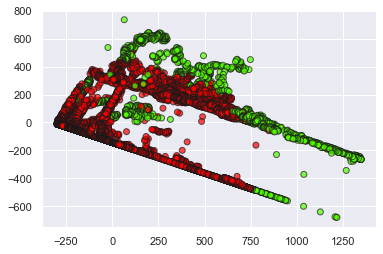

In [65]:
df['outliers'] = 0
for i in np.where(outliers==1):
    df['outliers'][i] = 1

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [66]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


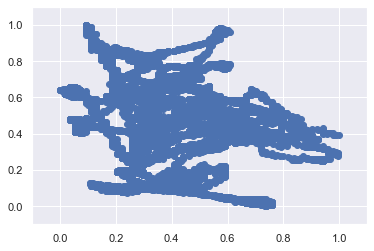

In [67]:
plt.scatter(X_sc[:, 0], X_sc[:, 1])
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

In [68]:
from scipy.spatial.distance import pdist, squareform

In [69]:
dist = squareform(pdist(X_sc, 'cityblock'))
for i in range(len(dist)):
    dist[i, i] = np.inf
dist

array([[       inf, 0.01890788, 0.03454419, ..., 1.24008161, 1.32432092,
        1.45838394],
       [0.01890788,        inf, 0.01721838, ..., 1.22783012, 1.31206943,
        1.44613245],
       [0.03454419, 0.01721838,        inf, ..., 1.2203229 , 1.30456221,
        1.43862524],
       ...,
       [1.24008161, 1.22783012, 1.2203229 , ...,        inf, 0.08423931,
        0.2589803 ],
       [1.32432092, 1.31206943, 1.30456221, ..., 0.08423931,        inf,
        0.17474099],
       [1.45838394, 1.44613245, 1.43862524, ..., 0.2589803 , 0.17474099,
               inf]])

In [70]:
k = 100
knn = np.argsort(dist, axis=1)[:, :k]
knn

array([[    1,     2,     5, ...,  1402,    23,  1433],
       [    2,     0,     5, ...,  1413, 13664, 13619],
       [    1,     5,     0, ..., 13613,    16, 13621],
       ...,
       [20547, 20546, 20545, ...,  9485,  9486,  9466],
       [20548, 20547, 20546, ...,  9466,  9508,  9404],
       [20549, 20548, 20547, ..., 19626,  9466, 17663]])

In [71]:
Rknn = np.zeros((len(dist), len(dist)))
for i in range(len(dist)):
    for j in knn[i]:
        Rknn[j][i] = 1
Rknn

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [72]:
Rknn_count = np.sum(Rknn, axis=1)
RKNN = Rknn_count.reshape(-1,1)

In [73]:
len(RKNN[RKNN<50])

1509